In [1]:
# Importing important libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
# Extracting the dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [3]:
# Adding another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price'] = boston.target
print(boston_df.head(3))
newX = boston_df.drop('Price',axis=1)
print(newX[0:3]) # check 
newY = boston_df['Price']
print(type(newY)) # pandas core frame

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
<class 'pandas.core.series.Series'>


In [4]:
# Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

152 152


In [5]:
# Training the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
# Ridge with low alpha
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha -> more generalization
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [7]:
# Ridge with high alpha
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [8]:
# Training and Testing Score
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [9]:
# Training and Testing score with low alpha
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [10]:
# Training and Testing score with high alpha
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

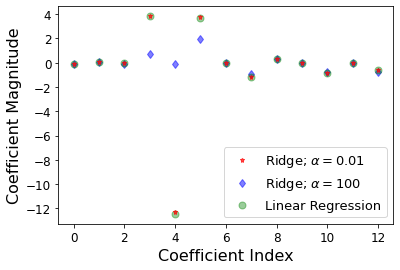

In [11]:
# Visualization
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [ ]:
# Let’s understand the figure above. 
# In X axis we plot the coefficient index and, for Boston data there are 13 features (for Python 0th index refers to 1st feature). 
# For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. 
# For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. 
# This is an example of shrinking coefficient magnitude using Ridge regression.